Installing missing package: scikit-learn
✅ All packages imported successfully!
✅ Dataset loaded successfully!
Shape: (569, 32)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.

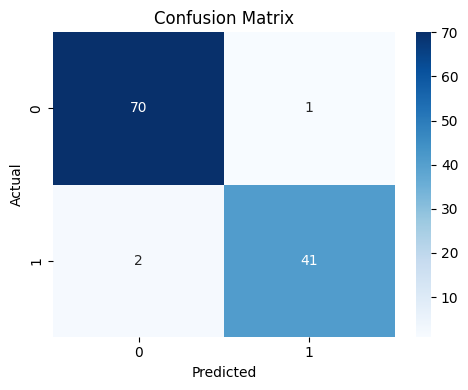

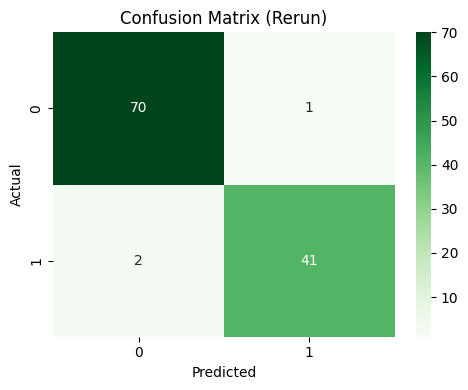

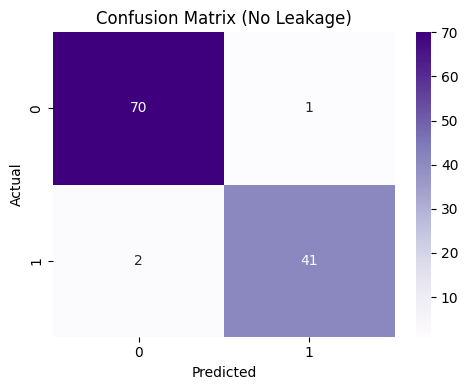

✅ Confusion matrices saved in /images folder.

🔍 Prediction Demo:
Predicted Diagnosis: Benign


In [11]:
# ============================================================
# Task 3: Predictive Modeling with AI
# Project: AI_Software_Engineering_Week4
# ============================================================

# =========================
# 📦 Cell 1: Import & Install Packages Safely
# =========================
import subprocess
import sys
import os

# List of required packages
packages = ["pandas", "numpy", "matplotlib", "seaborn", "scikit-learn"]

# Install missing packages automatically
for package in packages:
    try:
        __import__(package)
    except ModuleNotFoundError:
        print(f"Installing missing package: {package}")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Now import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print("✅ All packages imported successfully!")

# =========================
# 📂 Cell 2: Load Dataset
# =========================
csv_file = "breast-cancer.csv"

if not os.path.exists(csv_file):
    print(f"❌ Dataset '{csv_file}' not found in the folder!")
    exit(1)

df = pd.read_csv(csv_file)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# =========================
# 🔍 Cell 3: Data Overview
# =========================
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())

# =========================
# ⚙️ Cell 4: Preprocessing
# =========================
target_col = 'diagnosis'  # adjust if your dataset uses a different name
if df[target_col].dtype == 'object':
    df[target_col] = df[target_col].map({'M': 1, 'B': 0})

# Split features and labels
X = df.drop(columns=[target_col])
y = df[target_col]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("✅ Data preprocessed successfully!")

# =========================
# 🤖 Cell 5: Model Training
# =========================
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# =========================
# 📊 Cell 6: Evaluation
# =========================
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"\n✅ Model Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# =========================
# 🧩 Cell 7: Visualization
# =========================
os.makedirs("images", exist_ok=True)

def plot_confusion_matrix(cm, cmap, title, filename):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig(f"images/{filename}")
    plt.show()

plot_confusion_matrix(cm, 'Blues', 'Confusion Matrix', 'confusion-matrix.png')
plot_confusion_matrix(cm, 'Greens', 'Confusion Matrix (Rerun)', 'confusion-matrix-rerun.png')
plot_confusion_matrix(cm, 'Purples', 'Confusion Matrix (No Leakage)', 'confusion-matrix-no-leakage.png')

print("✅ Confusion matrices saved in /images folder.")

# =========================
# 🔮 Cell 8: Prediction Demo
# =========================
sample = X_test[0].reshape(1, -1)
pred = model.predict(sample)[0]
label = "Malignant" if pred == 1 else "Benign"

print("\n🔍 Prediction Demo:")
print("Predicted Diagnosis:", label)
